In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import proplot as pplt

In [2]:
import cartopy.crs as crs
import cartopy.feature as cfeature

In [ ]:
import tslearn
from tslearn.clustering import TimeSeriesKMeans

## Load files

In [3]:
hfls = xr.open_dataset('data/CMIP6.hfls.LabSea.Control.month.072022.nc')
hfss = xr.open_dataset('data/CMIP6.hfss.LabSea.Control.month.072022.nc')
psl = xr.open_dataset('data/CMIP6.psl.LabSea.Control.month.072022.nc')
tas = xr.open_dataset('data/CMIP6.tas.LabSea.Control.month.072022.nc')

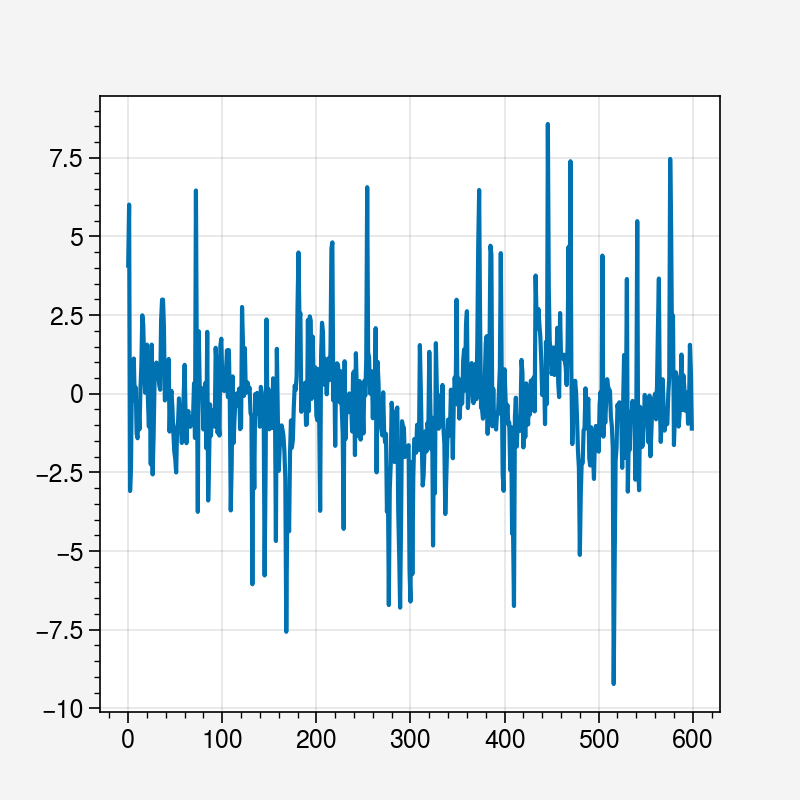

In [4]:
plt.plot(tas.tas.data[1])

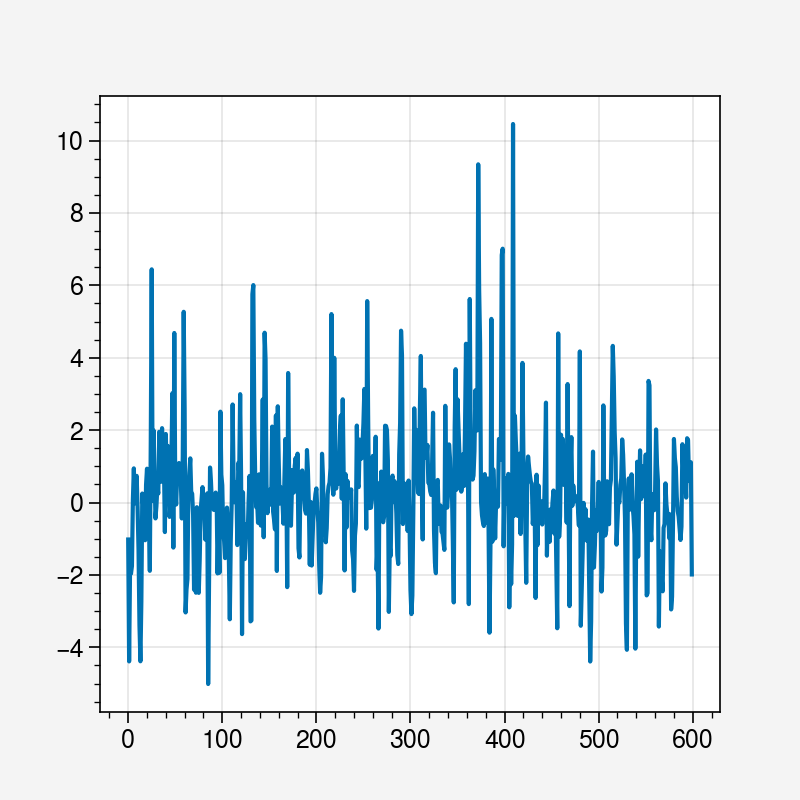

In [5]:
plt.plot(tas.tas.data[78])

In [6]:
tas_npy = tas.tas.data
hfls_npy = hfls.hfls.data
hfss_npy = hfss.hfss.data
psl_npy = psl.psl.data

In [45]:
tas_npy.shape

(469, 600)

In [46]:
tas2 = np.expand_dims(tas_npy, axis=2)

(469, 600, 1)

In [49]:
X_train = []
X_train.append(np.expand_dims(tas_npy, axis=2))
X_train.append(np.expand_dims(hfls_npy, axis=2))
X_train.append(np.expand_dims(hfss_npy, axis=2))
X_train.append(np.expand_dims(psl_npy, axis=2))

In [51]:
X_train = np.concatenate(X_train, axis = 2)

In [52]:
X_train.shape

(469, 600, 4)

In [26]:
seed = 42

In [53]:
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=9, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

Euclidean k-means
119380664.401 --> 73677249.902 --> 73610192.121 --> 73585370.189 --> 73580863.646 --> 73576823.845 --> 73572444.978 --> 73572444.978 --> 


In [55]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=9,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 469 out of 469 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Pa

31635984.497 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:    9.5s finished


26865134.639 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:    9.4s finished


26628238.024 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:    9.5s finished


26596502.224 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:    9.5s finished


26586274.958 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:    9.6s finished


26586274.958 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 469 out of 469 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1876 out of 1876 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Pa

31426641.901 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:    9.5s finished


26811220.975 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:    9.5s finished


26599352.854 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:    9.6s finished


26536528.918 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:    9.5s finished


26504733.331 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:    9.4s finished


26493113.387 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:   10.3s finished


26482701.398 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:    9.5s finished


26472136.264 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:    9.5s finished


26461992.076 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:    9.5s finished


26457869.303 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:    9.7s finished


26457869.303 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4221 out of 4221 | elapsed:    9.8s finished


In [56]:
y_pred

array([7, 4, 5, 4, 3, 3, 4, 4, 4, 7, 4, 7, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 7, 7, 7, 7, 3, 3, 7, 5, 6,
       3, 3, 5, 7, 4, 3, 3, 7, 3, 4, 3, 3, 3, 3, 4, 7, 4, 7, 7, 4, 4, 4,
       4, 3, 4, 3, 7, 7, 7, 3, 3, 7, 3, 4, 7, 4, 7, 4, 3, 4, 2, 3, 4, 4,
       4, 7, 3, 1, 3, 4, 4, 3, 3, 4, 3, 3, 7, 3, 7, 1, 3, 4, 4, 4, 4, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 4, 7, 7, 2, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4,
       4, 4, 3, 3, 4, 7, 1, 4, 7, 4, 3, 3, 7, 4, 3, 7, 3, 7, 1, 3, 7, 7,
       3, 3, 4, 3, 2, 8, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 7, 4, 3, 4, 7,
       4, 4, 4, 4, 4, 3, 4, 4, 7, 4, 3, 5, 7, 5, 5, 7, 4, 2, 4, 3, 3, 3,
       3, 7, 2, 5, 5, 4, 7, 5, 4, 3, 1, 3, 7, 4, 4, 7, 4, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 7, 4, 4, 4, 3, 4, 3, 3, 4, 5, 4, 3,
       2, 3, 7, 4, 3, 4, 3, 7, 7, 4, 5, 7, 3, 3, 4, 4, 3, 4, 5, 3, 3, 2,
       4, 4, 4, 7, 4, 3, 4, 4, 7, 0, 4, 3, 4, 4, 4, 3, 3, 3, 3, 4, 7, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 2, 4, 3, 3, 7,

In [ ]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=9,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

Soft-DTW k-means
